# Replication to Vaccines RCTs

## Polio

In [1]:
using Pkg
#Pkg.build("PyCall")

#Pkg.add("PyCall")

using PyCall
using Distributions

In [2]:
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\Luis\\.julia\\conda\\3\\lib\\site-packages\\numpy\\__init__.py'>

In [63]:
NT = 200745 #number of treated

NC = 201229 #number of controlled

YT = 33/NT  #average outcome for treated

YC =115/NC  #average outcome for controlled

#incidence per 100000 

print("Incidence per 100000 among treated:", (YT*100000), "%.                                        ")

print( "Incidence per 100000 among controlled:", (YC*100000),"%.")

Incidence per 100000 among treated:16.438765598146905%.                                        Incidence per 100000 among controlled:57.14882049803955%.

In [64]:
# treatment effect estimate reduction in incidence  per 100000 people

delta_hat = 100000*(YT-YC)

print("Estimate TE of occurances per 100,000 ", (100000*(YT-YC)))

Estimate TE of occurances per 100,000 -40.71005489989265

In [65]:
Var_delta_hat =  (100000^2)*(YT*(1-YT)/NT +  YC*(1-YC)/NC)

# standard deviation

print("Standard deviation for ATE ",(Var_delta_hat^.5))

Standard deviation for ATE 6.047412320702958

In [66]:
# here we are using the fact that outcomes are Bernoulli 

CI_delta0 = delta_hat -1.96*Var_delta_hat^.5
CI_delta1 = delta_hat +1.96*Var_delta_hat^.5

print("95 % confidence interval is [" ,(CI_delta0), ", ",(CI_delta1), "]"   )

95 % confidence interval is [-52.56298304847044, -28.85712675131485]

In [67]:
# Here we calculate the overall effectiveness of the vaccine and construct confidence intervals for it

NV =  200745;
NU =  201229;
RV = 33/NV;
RU = 115/NU;
VE = (RU - RV)/RU;
print("Overall VE is ",(VE) )

Overall VE is 0.7123516206478694

In [68]:
# this recovers the number in the table.

# we set up a simulation example.

# calulate variance of risk estimates:

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

2.8383662703286493e-9

In [69]:
using Random

B = 10000

x = rand(Truncated(Normal(0, 1), 0, 1), B)
y = rand(Truncated(Normal(0, 1), 0, 1), B)


10000-element Vector{Float64}:
 0.2940314983340788
 0.76037884587411
 0.37728573550573175
 0.26829919659017637
 0.7928897477320245
 0.1207468143885292
 0.5625563486786118
 0.4650827677381018
 0.43035741890909474
 0.03545802817597621
 0.095057566377603
 0.9580906266972624
 0.6127689353557351
 ⋮
 0.3709371250301755
 0.47504823998081247
 0.5759868833074293
 0.13127729976376484
 0.05349859178835982
 0.5502896193262885
 0.9918029973454754
 0.9262135566846526
 0.558202179833647
 0.9778216654636226
 0.17416994007260336
 0.6565881422638623

In [70]:
# set-up MC draws:
#Pkg.add("Statistics")
using Statistics

RVs = RV .+ x*((Var_RV)^0.5)
RUs = RU .+ x*((Var_RU)^0.5)
VEs= (RUs - RVs) ./ RUs


CI_VE_L = quantile!(VEs, 0.025)
CI_VE_U = quantile!(VEs, 0.975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [0.6916799538127626,0.7117968999864972]

In [71]:
#Pkg.add("Distributions")
#Pkg.add("StatsBase")
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("StatsPlots")

using Distributions  
using StatsBase
using CSV  
using DataFrames    
a= filter(t ->  quantile!(VEs, 0.025) < t <  quantile!(VEs, 0.975), VEs)
a
summarystats(a)

b=copy(a)

9501-element Vector{Float64}:
 0.701098050140494
 0.6916800199598013
 0.6916848856188057
 0.6916850276538482
 0.691691274438071
 0.6916926309593703
 0.6916930959913528
 0.6916941011689275
 0.6916946004184708
 0.6916950692134791
 0.6917010399595722
 0.6917018587969938
 0.6917034525809148
 ⋮
 0.7117785416400021
 0.7117786285778601
 0.7117800669143378
 0.7117839577480005
 0.7117839831884171
 0.711786931556741
 0.7117886405434896
 0.7117901531919797
 0.7117938095243949
 0.7117962246707922
 0.71179672297906
 0.7117968724462456

In [72]:
summarystats(b)

Summary Stats:
Length:         9501
Missing Count:  0
Mean:           0.702214
Minimum:        0.691680
1st Quartile:   0.697324
Median:         0.702399
3rd Quartile:   0.707210
Maximum:        0.711797


In [73]:
using DataFrames    
df = DataFrame(col1 = b)
summarystats(b)

Summary Stats:
Length:         9501
Missing Count:  0
Mean:           0.702214
Minimum:        0.691680
1st Quartile:   0.697324
Median:         0.702399
3rd Quartile:   0.707210
Maximum:        0.711797


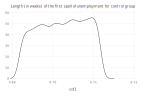

In [74]:
using Gadfly

Gadfly.plot(df, Coord.cartesian(xmin=0.69, xmax=0.72),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)
    #layer(x = "inuidur1", Geom.density , color=[colorant"black"]),

## Pfizer/BNTX Covid-19 RCT

In [75]:
NV =  19965; # number vaccinated
NU =  20172; # number unvaccinated
RV = 9/NV; # average outcome for vaccinated
RU = 169/NU; # average outcome for unvaccinated
VE = (RU - RV)/RU; # vaccine efficacy

In [76]:
# incidence per 100000
Incidence_RV=RV*100000
Incidence_RU=RU*100000

print("Incidence per 100000 among vaccinated:", Incidence_RV, ".         ")

print("Incidence per 100000 among unvaccinated:", Incidence_RU)

Incidence per 100000 among vaccinated:45.07888805409467.         Incidence per 100000 among unvaccinated:837.7949633154868

In [77]:
# treatment effect - estimated reduction in incidence per 100000 people
delta_hat = 100000*(RV-RU)

print("Estimated ATE of occurances per 100,000 is",  delta_hat)

Estimated ATE of occurances per 100,000 is-792.7160752613921

In [78]:
# variance, standard deviation and confidence interval of ATE using that outcomes are Bernoulli

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU
Var_delta_hat =  100000^2*(Var_RV + Var_RU)
Std_delta_hat = sqrt(Var_delta_hat)

print("Standard deviation for ATE is ", Std_delta_hat)


Standard deviation for ATE is 65.91015718590171

In [79]:

CI_b_delta = delta_hat -1.96*sqrt(Var_delta_hat)
CI_u_delta = delta_hat +1.96*sqrt(Var_delta_hat)

print("95 % confidence interval of ATE is [", (CI_b_delta), ",", (CI_u_delta), "]" ,".         "  )

print("Overall VE is", VE)

95 % confidence interval of ATE is [-921.8999833457594,-663.5321671770248].         Overall VE is0.9461934124362605

In [81]:
# we use an approximate bootstrap to find the VE confidence interval
# using Monte Carlo draws as before

using Random

B = 10000

x = rand(Truncated(Normal(0, 1), 0, 1), B)
y = rand(Truncated(Normal(0, 1), 0, 1), B)


RVs = RV .+ x*((Var_RV)^0.5)
RUs = RU .+ x*((Var_RU)^0.5)
VEs= (RUs - RVs) ./ RUs


CI_VE_L = quantile!(VEs, 0.025)
CI_VE_U = quantile!(VEs, 0.975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [0.9338126549150759,0.9459198961012977]

In [82]:
#plot
using Distributions  
using StatsBase
using CSV  
using DataFrames    
a= filter(t ->  quantile!(VEs, 0.025) < t <  quantile!(VEs, 0.975), VEs)
a
summarystats(a)

b=copy(a)
summarystats(b)

Summary Stats:
Length:         9501
Missing Count:  0
Mean:           0.940218
Minimum:        0.933813
1st Quartile:   0.937358
Median:         0.940344
3rd Quartile:   0.943241
Maximum:        0.945920


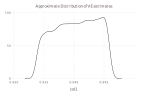

In [84]:
using DataFrames    
df = DataFrame(col1 = b)

using Gadfly

Gadfly.plot(df, Coord.cartesian(xmin=0.93, xmax=0.95),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)

In [88]:
# Here we calculate the overall effectiveness of the vaccine for the two groups that are 65 or older
NV =  3239+805;
NU =  3255+812;
RV = 1/NV;
RU = (14+5)/NU;
VE = (RU - RV)/RU;

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

print("Overall VE is ", VE)


Overall VE is 0.9470690822010516

In [ ]:
# As before, we use an approximate bootstrap to find the confidence intervals
# using Monte Carlo draws
